In [3]:
import pandas as pd
import numpy as np

In [4]:
a = pd.read_csv('complete.csv')
b = pd.read_csv('tracks 2.csv')
df2 = pd.merge(a, b, how='inner', left_on= 'track_id', right_on='id')

FileNotFoundError: [Errno 2] No such file or directory: 'complete.csv'

In [ ]:
df2

In [268]:
df2.head()

,track_title,artist_name,track_id,duration_ms_x,energy_x,key_x,mode_x,time_signature_x,acousticness_x,danceability_x,...,key_y,loudness_y,mode_y,speechiness_y,acousticness_y,instrumentalness_y,liveness_y,valence_y,tempo_y,time_signature_y
0,Oggi No (Sanremo 2018),Romantika,6lBcqaog2TFpP60ZBR10Tn,227031,0.668,6,1,4,0.0419,0.565,...,6,-8.871,1,0.0363,0.0419,0.000151,0.0876,0.140,154.011,4
1,Understatement of the Year,always rushing by,3m7cy32Kw4KdQNgKwIz7pz,224080,0.725,4,1,4,0.1400,0.526,...,4,-10.979,1,0.0561,0.1400,0.000000,0.2760,0.450,92.129,4
2,Closer,The Chainsmokers,7BKLCZ1jbUBVqRi2FVlTVw,244960,0.524,8,1,4,0.4140,0.748,...,8,-5.599,1,0.0338,0.4140,0.000000,0.1110,0.661,95.010,4
3,Rockabye,Clean Bandit,5knuzwU65gJK7IF5yJsuaW,251088,0.763,9,0,4,0.4060,0.720,...,9,-4.068,0,0.0523,0.4060,0.000000,0.1800,0.742,101.965,4
4,Black Beatles,Rae Sremmurd,6fujklziTHa8uoM5OQSfIo,291893,0.632,0,1,4,0.1420,0.794,...,0,-6.163,1,0.0649,0.1420,0.000000,0.1280,0.355,145.926,4


In [269]:
df2.isna().sum()

track_title           0
artist_name           0
track_id              0
duration_ms_x         0
energy_x              0
key_x                 0
mode_x                0
time_signature_x      0
acousticness_x        0
danceability_x        0
instrumentalness_x    0
liveness_x            0
loudness_x            0
speechiness_x         0
valence_x             0
tempo_x               0
On_chart              0
id                    0
name                  0
popularity            0
duration_ms_y         0
explicit              0
artists               0
id_artists            0
release_date          0
danceability_y        0
energy_y              0
key_y                 0
loudness_y            0
mode_y                0
speechiness_y         0
acousticness_y        0
instrumentalness_y    0
liveness_y            0
valence_y             0
tempo_y               0
time_signature_y      0
dtype: int64

In [270]:
cat_cols = list(df.select_dtypes('object').columns)
cat_cols

['track_title',
 'artist_name',
 'track_id',
 'id',
 'name',
 'artists',
 'id_artists',
 'release_date']

In [271]:
df2=df.drop(['track_title',
 'artist_name',
 'track_id',
 'id',
 'name',
 'artists',
 'id_artists',
 'release_date',
'popularity'], axis=1)

In [245]:
# Imports
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.ensemble import RandomForestClassifier

In [246]:
# Target
y = df2['On_chart']
# Features
X = df2.drop("On_chart", axis=1)

In [247]:
# Initial Train-Test Split
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=.15, random_state=2021)

In [248]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=.15, random_state=2021)

In [249]:
X_train.isna().sum()

duration_ms_x         0
energy_x              0
key_x                 0
mode_x                0
time_signature_x      0
acousticness_x        0
danceability_x        0
instrumentalness_x    0
liveness_x            0
loudness_x            0
speechiness_x         0
valence_x             0
tempo_x               0
duration_ms_y         0
explicit              0
danceability_y        0
energy_y              0
key_y                 0
loudness_y            0
mode_y                0
speechiness_y         0
acousticness_y        0
instrumentalness_y    0
liveness_y            0
valence_y             0
tempo_y               0
time_signature_y      0
dtype: int64

In [250]:
X_val.isna().sum()

duration_ms_x         0
energy_x              0
key_x                 0
mode_x                0
time_signature_x      0
acousticness_x        0
danceability_x        0
instrumentalness_x    0
liveness_x            0
loudness_x            0
speechiness_x         0
valence_x             0
tempo_x               0
duration_ms_y         0
explicit              0
danceability_y        0
energy_y              0
key_y                 0
loudness_y            0
mode_y                0
speechiness_y         0
acousticness_y        0
instrumentalness_y    0
liveness_y            0
valence_y             0
tempo_y               0
time_signature_y      0
dtype: int64

In [251]:
num_cols = list(X.select_dtypes('number').columns)
num_cols

['duration_ms_x',
 'energy_x',
 'key_x',
 'mode_x',
 'time_signature_x',
 'acousticness_x',
 'danceability_x',
 'instrumentalness_x',
 'liveness_x',
 'loudness_x',
 'speechiness_x',
 'valence_x',
 'tempo_x',
 'duration_ms_y',
 'explicit',
 'danceability_y',
 'energy_y',
 'key_y',
 'loudness_y',
 'mode_y',
 'speechiness_y',
 'acousticness_y',
 'instrumentalness_y',
 'liveness_y',
 'valence_y',
 'tempo_y',
 'time_signature_y']

In [252]:
# Instantiate StandardScaler
scaler = StandardScaler()

In [253]:
scaler.fit(X_train[num_cols])

StandardScaler()

In [254]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=num_cols)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[num_cols]), columns=num_cols)

In [255]:
X_train_scaled

,duration_ms_x,energy_x,key_x,mode_x,time_signature_x,acousticness_x,danceability_x,instrumentalness_x,liveness_x,loudness_x,...,key_y,loudness_y,mode_y,speechiness_y,acousticness_y,instrumentalness_y,liveness_y,valence_y,tempo_y,time_signature_y
0,-0.122192,0.657965,0.204078,-1.480644,0.142054,-0.742078,0.385264,-0.229210,0.800508,-1.251153,...,0.204078,-1.251170,-1.480644,-0.401691,-0.742109,-0.229196,0.800497,0.612779,0.093021,0.142054
1,-0.857324,0.894083,-0.074153,-1.480644,0.142054,0.615997,0.098732,-0.229166,0.018149,0.409318,...,-0.074153,0.409312,-1.480644,-0.302834,0.615960,-0.229152,0.018135,1.457904,-0.594541,0.142054
2,-0.929834,0.070293,-1.465306,0.675382,0.142054,-0.041274,1.776990,-0.229210,0.340700,0.698244,...,-1.465306,0.698239,0.675382,3.027081,-0.041308,-0.229196,0.340688,0.595960,-0.397090,0.142054
3,0.148185,-0.748249,1.595231,-1.480644,0.142054,2.011631,0.235175,-0.091488,-0.153421,-2.534888,...,1.595231,-2.534913,-1.480644,-0.231293,2.011587,-0.091463,-0.153435,1.037444,0.078981,0.142054
4,0.017838,0.290670,1.317000,-1.480644,0.142054,-0.890476,1.108416,-0.229101,5.261329,-0.597955,...,1.317000,-0.597968,-1.480644,1.127988,-0.890506,-0.229087,5.261332,0.061976,-0.991538,0.142054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7548,0.806916,1.534225,-1.465306,0.675382,0.142054,-0.823597,-0.085468,0.401648,-0.400482,0.585789,...,-1.465306,0.585784,0.675382,-0.295030,-0.823627,0.401712,-0.400497,-0.715876,0.831867,0.142054
7549,0.719410,-0.171072,-1.187076,-1.480644,-4.166921,1.017189,-1.572705,-0.229210,5.069171,-0.146155,...,-1.187076,-0.146165,-1.480644,2.766931,1.017149,-0.229196,5.069173,0.553914,0.883152,-4.166921
7550,-0.740676,-0.291754,-0.352384,-1.480644,0.142054,0.837933,-0.310600,-0.229196,-0.554209,0.708158,...,-0.352384,0.708153,-1.480644,-0.324947,0.837894,-0.229182,-0.554224,-0.963948,0.255609,0.142054
7551,-0.900568,-0.129095,0.482308,0.675382,0.142054,-0.747200,-0.071823,-0.227717,0.683840,-0.987437,...,0.482308,-0.987453,0.675382,-0.547375,-0.747230,-0.227703,0.683829,0.448799,0.079415,0.142054


In [256]:
# Instantiate LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [257]:
def modeling_function(model, X_train, y_train, X_val_scaled, y_val):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy: ', accuracy_score(y_val, val_preds))
    return model
logreg = modeling_function(logreg, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy:  0.9998676022772408
Validation accuracy:  1.0


In [259]:
from sklearn.metrics import plot_confusion_matrix

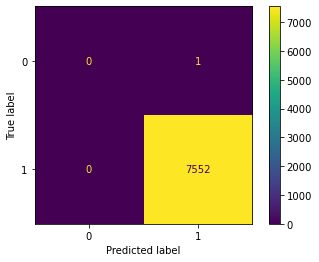

In [260]:
plot_confusion_matrix(logreg, X_train_scaled, y_train)

In [261]:
test_preds = logreg.predict(X_test)

In [262]:
accuracy_score(y_test, test_preds)

0.9993626513702996

In [237]:
df2.corr()['On_chart']

duration_ms_x         0.003661
energy_x             -0.003426
key_x                 0.000993
mode_x               -0.009356
time_signature_x     -0.002045
acousticness_x        0.007408
danceability_x        0.006853
instrumentalness_x    0.003178
liveness_x           -0.000387
loudness_x            0.006571
speechiness_x         0.004614
valence_x             0.016785
tempo_x              -0.000983
On_chart              1.000000
duration_ms_y         0.003661
explicit              0.005265
danceability_y        0.006853
energy_y             -0.003426
key_y                 0.000993
loudness_y            0.006571
mode_y               -0.009356
speechiness_y         0.004614
acousticness_y        0.007407
instrumentalness_y    0.003177
liveness_y           -0.000387
valence_y             0.016784
tempo_y              -0.000983
time_signature_y     -0.002045
Name: On_chart, dtype: float64

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
sm = SMOTE(random_state=2021)

In [46]:
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

In [47]:
y_train_res.value_counts()

1    12557
0    12557
Name: On_chart, dtype: int64

In [48]:
logreg2 = LogisticRegression(solver='liblinear')

In [49]:
logreg2.fit(X_train_res, y_train_res)

LogisticRegression(solver='liblinear')

In [50]:
logreg2 = modeling_function(logreg2, X_train_res, y_train_res, X_val_scaled, y_val)

Training accuracy:  0.7727960500119455
Validation accuracy:  0.5047404063205417


In [51]:
rf = RandomForestClassifier(random_state=2021)

In [52]:
rf = modeling_function(rf, X_train_res, y_train_res, X_val_scaled, y_val)

Training accuracy:  1.0
Validation accuracy:  0.4932279909706546


In [61]:
# Create Param Grid 
param_grid = {'n_estimators': [100, 150, 200],
                'max_depth': [10, 15, 20, 25, 30],
                'min_samples_leaf': [1, 2, 3],
                'n_jobs': [-1],
                'criterion': ['gini']}

In [62]:
# Create GridSearchCV
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy')

In [63]:
rf_gs.fit(X_train_res, y_train_res)

GridSearchCV(estimator=RandomForestClassifier(random_state=2021),
             param_grid={'criterion': ['gini'],
                         'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 150, 200], 'n_jobs': [-1]},
             scoring='accuracy')

In [64]:
best_model = rf_gs.best_estimator_

In [65]:
rf_gs.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 3,
 'n_estimators': 100,
 'n_jobs': -1}

In [69]:
rf = modeling_function(rf_gs, X_train_res, y_train_res, X_val_scaled, y_val)

Training accuracy:  0.9516206100183164
Validation accuracy:  0.4979683972911964


,duration_ms,energy,key,mode,time_signature,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,-0.004930,-2.350385,-0.335195,0.737102,0.198880,2.167450,-1.706196,-0.546589,-0.513620,-2.446999,-0.491581,-1.524405,0.380110
1,0.102190,-0.778424,1.325660,0.737102,0.198880,1.242899,1.401837,0.841095,-0.495375,0.234191,-0.501343,-1.226074,-0.613712
2,0.059131,1.032147,1.048851,-1.356665,0.198880,-0.409698,0.154208,-0.547197,-0.612754,0.913320,-0.519092,0.101496,-0.514714
3,-0.040894,-0.236513,-0.888814,0.737102,0.198880,-0.361376,1.550890,-0.547204,-0.604239,0.296280,0.016030,1.481275,-0.338817
4,-1.260341,0.893518,-0.335195,-1.356665,0.198880,-0.753425,1.837956,1.983190,-0.880962,-0.047920,-0.247537,-0.152084,0.175114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425,-0.436365,-0.190303,0.495233,-1.356665,-1.912661,-0.785317,0.971240,-0.547201,-0.551935,0.418708,0.016917,-1.117930,1.139701
4426,-1.068539,-0.707009,0.495233,0.737102,0.198880,1.813093,0.750420,-0.547218,-0.428475,0.662516,-0.509330,0.951738,0.728164
4427,-0.199429,0.427223,-1.442432,0.737102,0.198880,-0.764378,-0.022448,-0.547218,-0.843863,0.316393,-0.402838,-1.319303,0.278367
4428,1.048712,0.507039,-0.335195,-1.356665,0.198880,0.034860,1.175498,-0.547204,-0.598765,0.923290,0.978007,1.030050,1.925919


In [70]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=num_cols)

In [72]:
test_preds = rf_gs.predict(X_test)

In [75]:
accuracy_score(y_test, test_preds)

0.49261178276722317

In [76]:
df2.corr()['On_chart']

duration_ms         0.152852
energy              0.227209
key                -0.003404
mode                0.096454
time_signature      0.117241
acousticness       -0.214171
danceability        0.097668
instrumentalness   -0.463793
liveness           -0.035693
loudness            0.302076
speechiness        -0.182983
valence             0.275689
tempo               0.041700
On_chart            1.000000
Name: On_chart, dtype: float64

In [291]:
cat_cols = list(a.select_dtypes('object').columns)
cat_cols

['track_title', 'artist_name', 'track_id']

In [311]:
# Target
y1 = a['On_chart']
# Features
X1 = a.drop(['On_chart','track_title', 'artist_name', 'track_id'], axis=1)

In [336]:
# Initial Train-Test Split
X_tr1, X_test1, y_tr1, y_test1 = train_test_split(X, y, test_size=.15, random_state=2021)

In [337]:
# Instantiate StandardScaler
scaler1 = StandardScaler()

In [338]:
scaler1.fit(X_train[num_cols])

StandardScaler()

In [345]:
X_train_scaled1 = pd.DataFrame(scaler.transform(X_tr1[num_cols]), columns=num_cols)
X_val_scaled1 = pd.DataFrame(scaler.transform(X_test1[num_cols]), columns=num_cols)

KeyError: "None of [Index(['duration_ms_x', 'energy_x', 'key_x', 'mode_x', 'time_signature_x',\n       'acousticness_x', 'danceability_x', 'instrumentalness_x', 'liveness_x',\n       'loudness_x', 'speechiness_x', 'valence_x', 'tempo_x', 'duration_ms_y',\n       'explicit', 'danceability_y', 'energy_y', 'key_y', 'loudness_y',\n       'mode_y', 'speechiness_y', 'acousticness_y', 'instrumentalness_y',\n       'liveness_y', 'valence_y', 'tempo_y', 'time_signature_y'],\n      dtype='object')] are in the [columns]"

In [343]:
X_test_scaled1 = pd.DataFrame(scaler.transform(X_test1[num_cols]), columns=num_cols)

KeyError: "None of [Index(['duration_ms_x', 'energy_x', 'key_x', 'mode_x', 'time_signature_x',\n       'acousticness_x', 'danceability_x', 'instrumentalness_x', 'liveness_x',\n       'loudness_x', 'speechiness_x', 'valence_x', 'tempo_x', 'duration_ms_y',\n       'explicit', 'danceability_y', 'energy_y', 'key_y', 'loudness_y',\n       'mode_y', 'speechiness_y', 'acousticness_y', 'instrumentalness_y',\n       'liveness_y', 'valence_y', 'tempo_y', 'time_signature_y'],\n      dtype='object')] are in the [columns]"

In [316]:
# Instantiate LogisticRegression
logreg3 = LogisticRegression(solver='liblinear')

In [317]:
logreg3.fit(X_train_scaled1, y_train_res)

LogisticRegression(solver='liblinear')

In [325]:
def modeling_function(model, X_train, y_train, X_val_scaled, y_val):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy: ', accuracy_score(y_val, val_preds))
    return model
logreg3 = modeling_function(logreg, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy:  0.9998676022772408
Validation accuracy:  1.0


In [342]:
test_preds = logreg3.predict(X_test)

ValueError: X has 13 features per sample; expecting 27

In [327]:
accuracy_score(y_test, test_preds)

0.5079639224716945